**About this DATASET** \\
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/train.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Chúng tôi có một tập dữ liệu về những khách hàng đã mua hàng vào Black Friday, vì vậy, chúng tôi muốn thực hiện một số phân tích về dữ liệu để hiểu rõ hơn và hiểu xem liệu có mối quan hệ giữa giới tính, nghề nghiệp, thành phố hay độ tuổi và việc mua hàng hay không.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


**Kiểm tra dữ liệu bị thiếu**

In [64]:
data.isnull().sum() / data.shape[0] * 100

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


- 31% Product_Category_2 không có dữ liệu
- 69% Product_Category_3 không có dữ liệu

In [65]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


**Phân tích dữ liệu**

<ipython-input-66-67cd752fff2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'],color = 'r')


<Axes: title={'center': 'Purchase Distribution'}, xlabel='Purchase', ylabel='Density'>

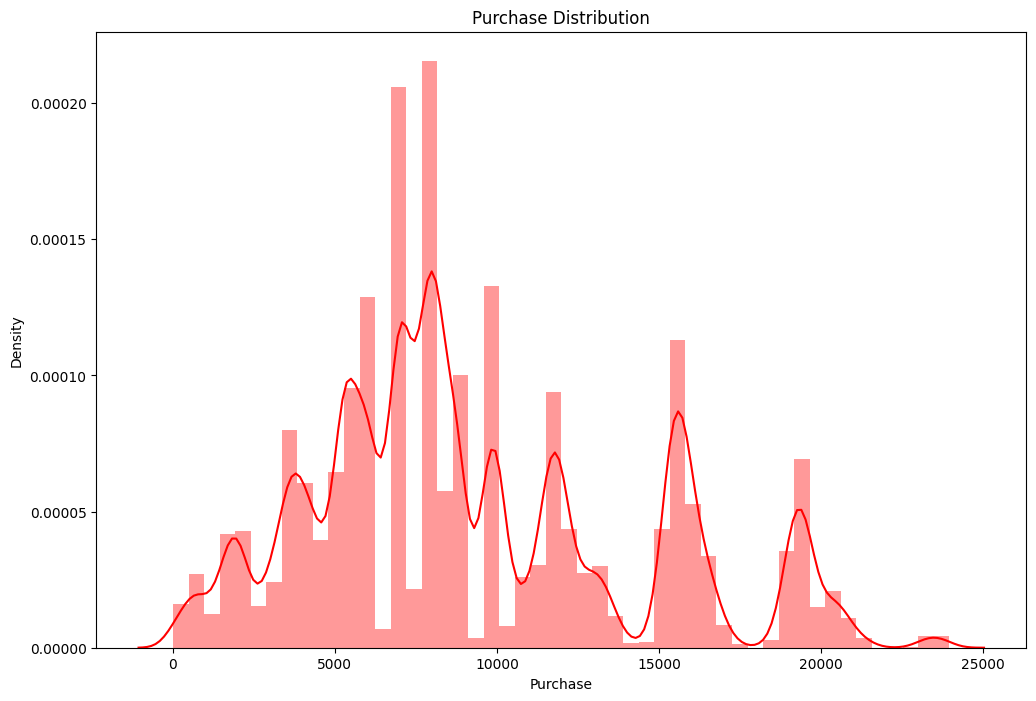

In [66]:
plt.figure(figsize = (12,8))
plt.title("Purchase Distribution")
sns.distplot(data['Purchase'],color = 'r')

**Kiểm tra Outlier**




In [67]:
data['Purchase'].skew()

np.float64(0.6001400037087128)

Giá trị độ lệch (skewness) tính ra > 0.5. Kết luận: Purchase lệch nhẹ về phía bên phải

<ipython-input-68-e03a56a5ff51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['Purchase'], palette = "Set3")


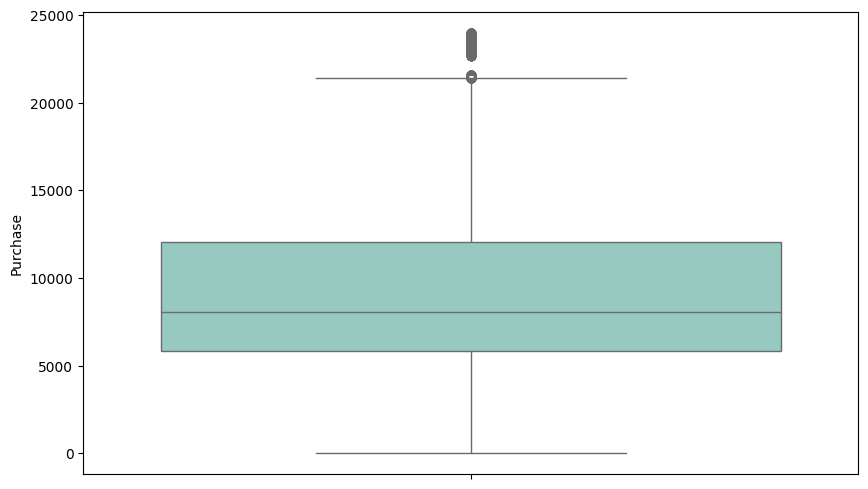

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot(data['Purchase'], palette = "Set3")
plt.show()

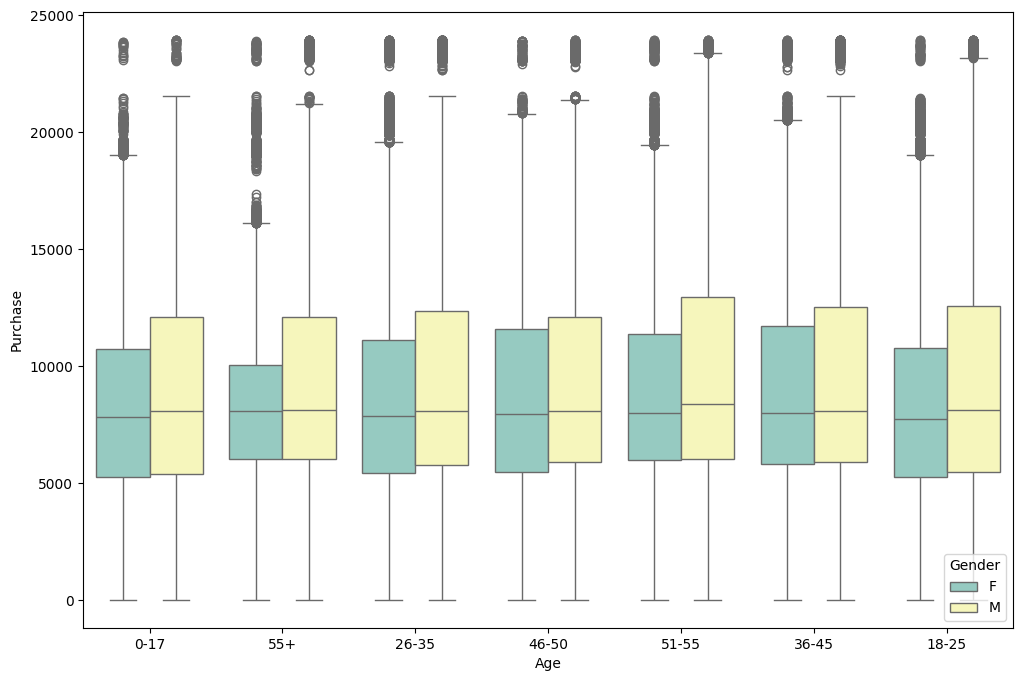

In [69]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Age', y = 'Purchase', data= data, hue = "Gender", palette = 'Set3')
plt.show()

**Phân tích theo giới tính**

In [70]:
data.Gender.value_counts()

,count
Gender,
M,414259
F,135809


In [71]:
data["Gender"].value_counts(normalize= True) * 100

,proportion
Gender,
M,75.310507
F,24.689493


<ipython-input-72-cbe1dc20df3c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = data, order =['M','F'], palette = "Set2")


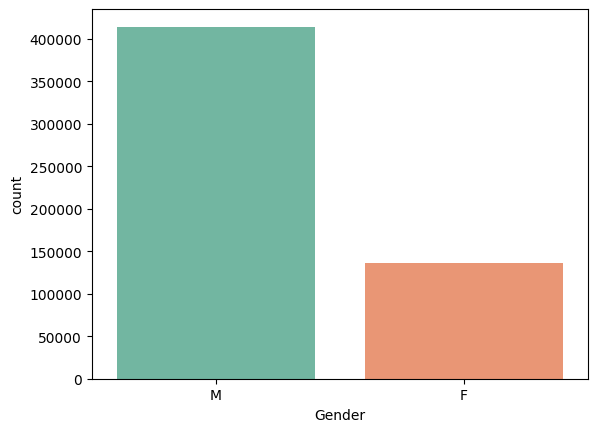

In [72]:
sns.countplot(x = 'Gender', data = data, order =['M','F'], palette = "Set2")
plt.show()

In [73]:
data.groupby("Gender")["Purchase"].mean().reindex(['M', 'F'])

,Purchase
Gender,
M,9437.526040
F,8734.565765


**Tình trạng hôn nhân**

In [74]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


<ipython-input-75-361f07bfc880>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Marital_Status', data = data, order = ['0','1'], palette = "Set1")


<Axes: xlabel='Marital_Status', ylabel='count'>

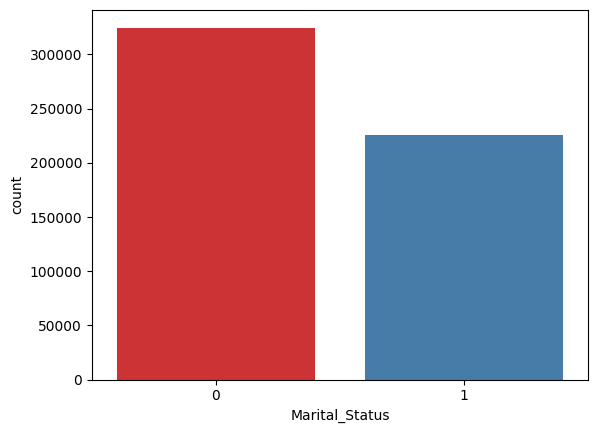

In [75]:
sns.countplot(x = 'Marital_Status', data = data, order = ['0','1'], palette = "Set1")

In [76]:
data.groupby('Marital_Status')["Purchase"].mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


Người độc thân và có gia đình có mức chi tiêu trong ngày Black Friday gần như tương đương

**Nghề nghiệp**

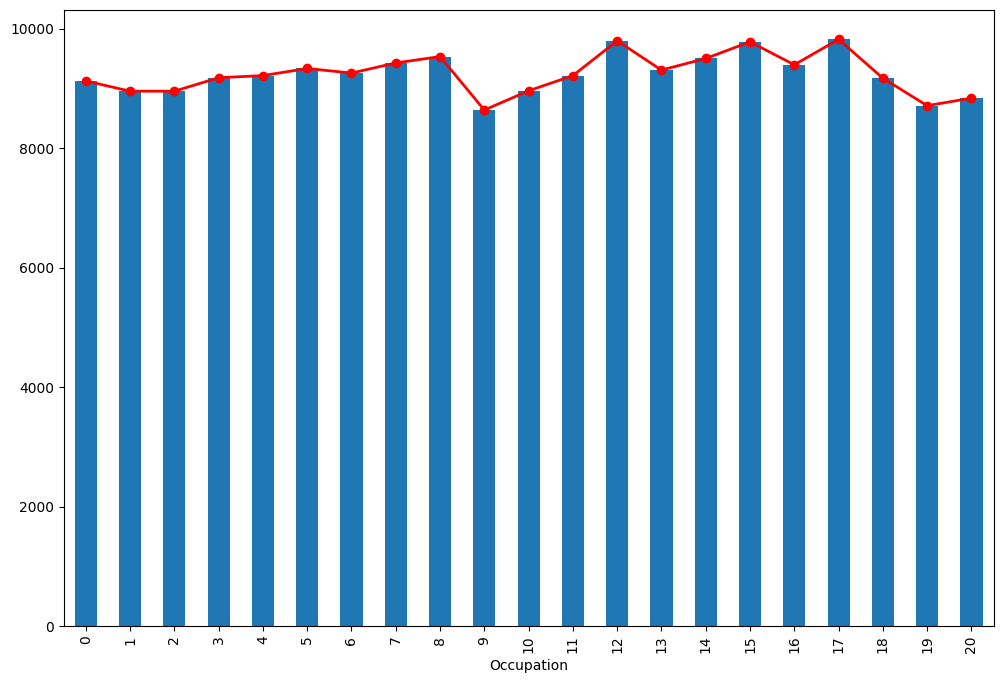

In [77]:
jobs = data.groupby("Occupation")["Purchase"].mean()
plt.figure(figsize = (12,8));
jobs.plot(kind='bar')
plt.plot(jobs.index, jobs.values, color='red', linewidth=2, marker='o', markersize=6)

**Age**

<ipython-input-78-46d5a7408e82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Age', data = data, order = order, palette = "Set2")


<Axes: xlabel='Age', ylabel='count'>

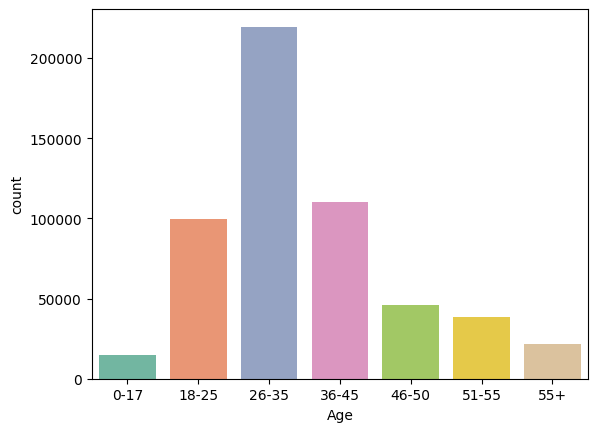

In [78]:
order = sorted(data['Age'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.replace('+', '')))
sns.countplot(x = 'Age', data = data, order = order, palette = "Set2")

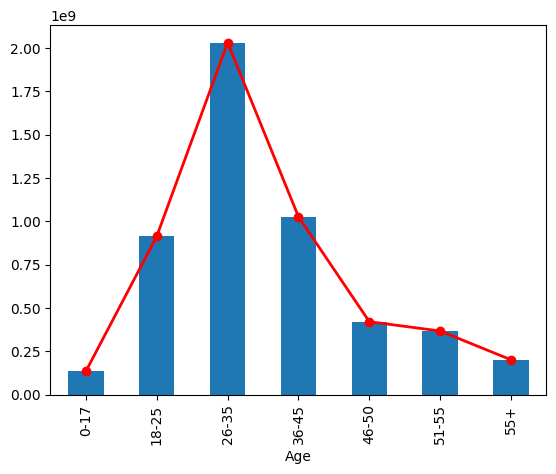

In [79]:
age = data.groupby('Age')["Purchase"].sum()
age.plot(kind ='bar')
plt.plot(age.index, age.values, color='red', linewidth=2, marker='o', markersize=6)

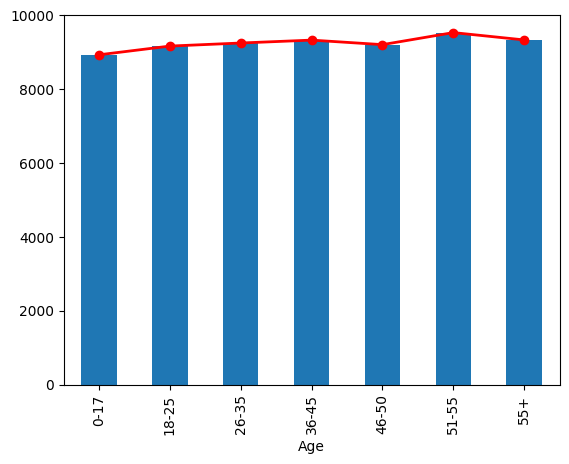

In [80]:
age = data.groupby('Age')["Purchase"].mean()
age.plot(kind ='bar')
plt.plot(age.index, age.values, color='red', linewidth=2, marker='o', markersize=6)

**Product_Category_1**

<Axes: xlabel='Product_Category_1'>

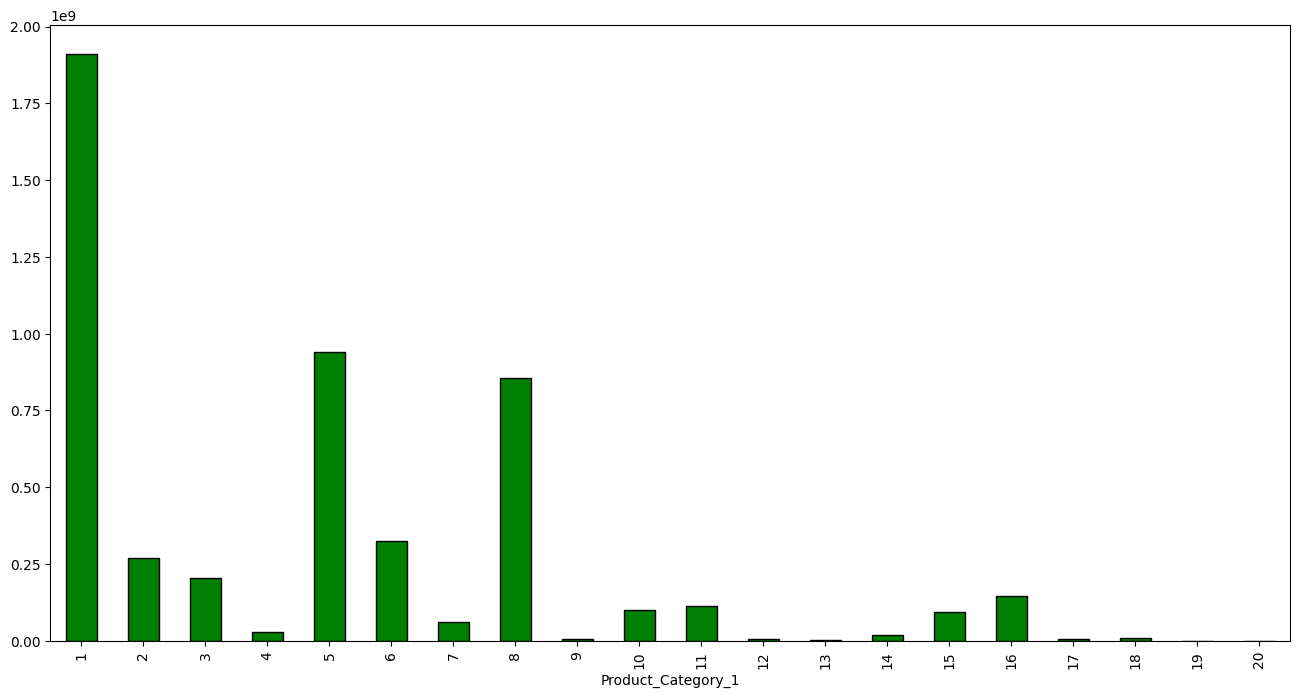

In [81]:
product_purchase = data.groupby('Product_Category_1')['Purchase'].sum()
plt.figure(figsize = (16,8))
product_purchase.plot(kind='bar', color='green', edgecolor='black', label='Total Purchases')


**Product_Category_2**

<Axes: xlabel='Product_Category_2'>

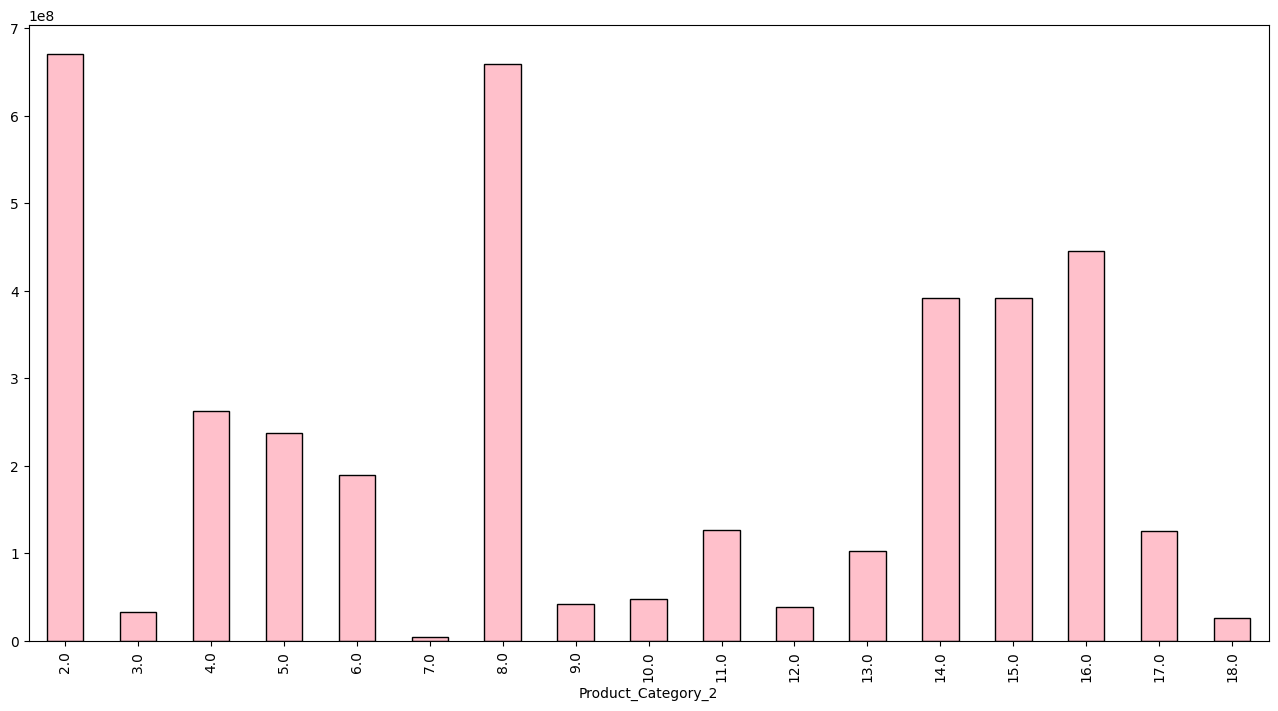

In [82]:
product_purchase = data.groupby('Product_Category_2')['Purchase'].sum()
plt.figure(figsize = (16,8))
product_purchase.plot(kind='bar', color='pink', edgecolor='black', label='Total Purchases')

**Product_Category_3**

<Axes: xlabel='Product_Category_3'>

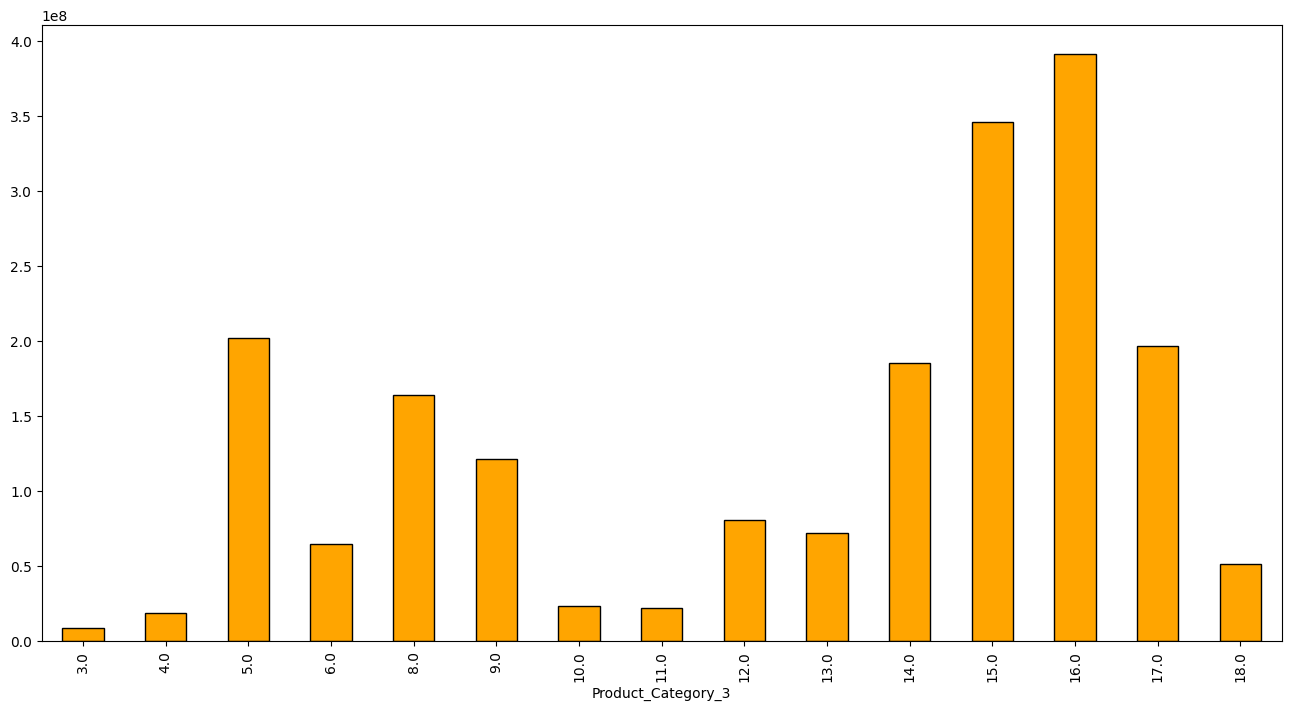

In [83]:
product_purchase = data.groupby('Product_Category_3')['Purchase'].sum()
plt.figure(figsize = (16,8))
product_purchase.plot(kind='bar', color='orange', edgecolor='black', label='Total Purchases')

**Correlation Matrix**

<Axes: >

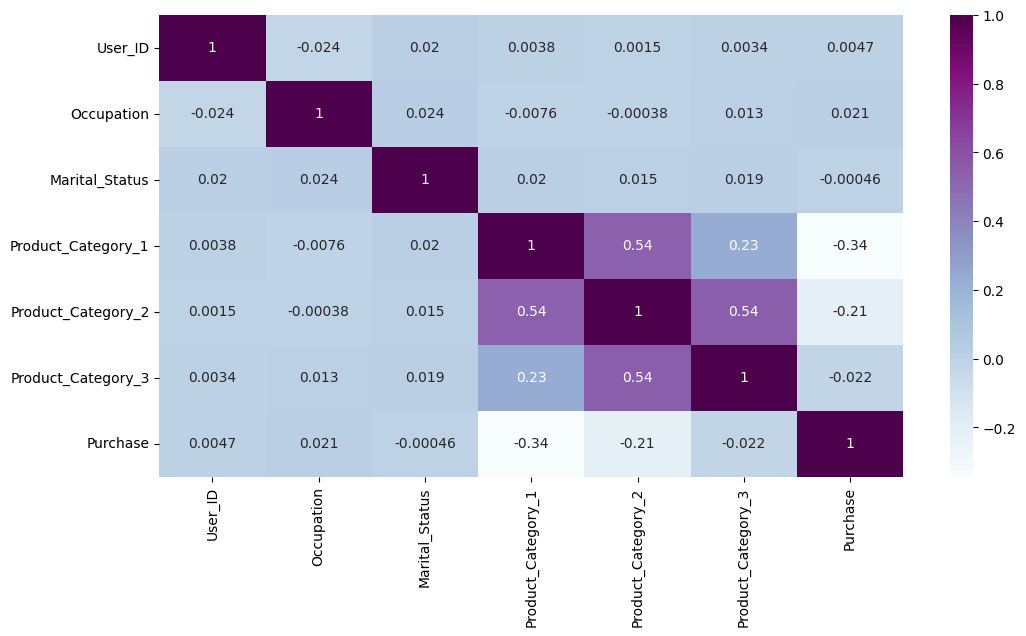

In [84]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot = True,cmap = 'BuPu')

**Data Preprocessing**

In [85]:
df = data.copy()

In [86]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [87]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


Delete 2 columns User_ID and Product_ID

In [88]:
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


Convert values from strings to integers

In [89]:
df.Stay_In_Current_City_Years.replace({'0':0,
                                         '1':1,
                                         '2':2,
                                         '3':3,
                                         '4+':4},inplace = True)
df.Gender.replace({'M':1,'F':0},inplace = True)
df.City_Category.replace({'A':1,'B':2,'C':3},inplace = True)
df.Age.replace({'0-17' :17,
                  '18-25':20,
                  '26-35':30,
                  '36-45':40,
                  '46-50':47,
                  '51-55':52,
                  '55+' : 56},
                 inplace = True)
df

<ipython-input-89-5dcbf29b5d5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Stay_In_Current_City_Years.replace({'0':0,
<ipython-input-89-5dcbf29b5d5a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Stay_In_Current_City_Years.replace({'0':0,
<ipython-input-89-5dcbf29b5d5a>:6: FutureWarni

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,17,10,1,2,0,3,NaN,NaN,8370
1,0,17,10,1,2,0,1,6.0,14.0,15200
2,0,17,10,1,2,0,12,NaN,NaN,1422
3,0,17,10,1,2,0,12,14.0,NaN,1057
4,1,56,16,3,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,52,13,2,1,1,20,NaN,NaN,368
550064,0,30,1,3,3,0,20,NaN,NaN,371
550065,0,30,15,2,4,1,20,NaN,NaN,137
550066,0,56,1,3,2,0,20,NaN,NaN,365


In [90]:
df.drop('Product_Category_3', axis = 1, inplace=True)

Chúng tôi đã bỏ cột này vì thiếu 2/3 dữ liệu

In [91]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,17,10,1,2,0,3,0.0,8370
1,0,17,10,1,2,0,1,6.0,15200
2,0,17,10,1,2,0,12,0.0,1422
3,0,17,10,1,2,0,12,14.0,1057
4,1,56,16,3,4,0,8,0.0,7969
...,...,...,...,...,...,...,...,...,...
550063,1,52,13,2,1,1,20,0.0,368
550064,0,30,1,3,3,0,20,0.0,371
550065,0,30,15,2,4,1,20,0.0,137
550066,0,56,1,3,2,0,20,0.0,365


**Chia giữa liệu làm 2 phần Train và Test**

In [92]:
X = df.drop("Purchase",axis = True)
y = df["Purchase"]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #30% of the data will be used as the test set, while the remaining 70% will be used as the training set.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(385047, 8)
(165021, 8)
(385047,)
(165021,)


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import time

In [95]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Scale các features cho kết quả kém hơn nên nhóm đã không scale

# Linear Regression

Mean Absolute Error: 3600.1014808185673
R2 Score: 0.12257466636507963
Execution Time: 0.11949348449707031


<ipython-input-96-48910f76904e>:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


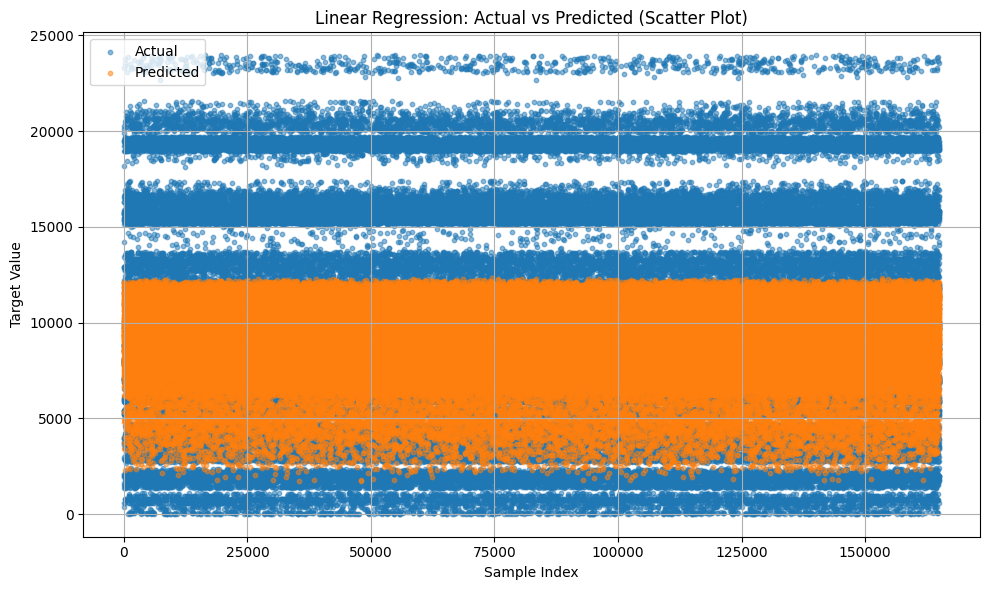

In [96]:
# Bắt đầu tính thời gian
start_time = time.time()

# Huấn luyện mô hình Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Dự đoán
y_pred = LR.predict(X_test)

# Tính MAE
LN_MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", LN_MAE)

# Tính thời gian và R2
end_time = time.time()
LN_time = end_time - start_time
LN_r2 = r2_score(y_test, y_pred)
print("R2 Score:", LN_r2)
print("Execution Time:", LN_time)

# Vẽ scatter plot: Giá trị thực tế vs Dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.5, s=10)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.5, s=10)
plt.title("Linear Regression: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
LN_time = end_time - start_time
LN_r2 = r2_score(y_test, y_pred)
LN_r2

0.12257466636507963

# Decission Tree

Mean Absolute Error: 2279.8615505788093
Execution Time: 1.4384136199951172


<ipython-input-98-c1c35e027b77>:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


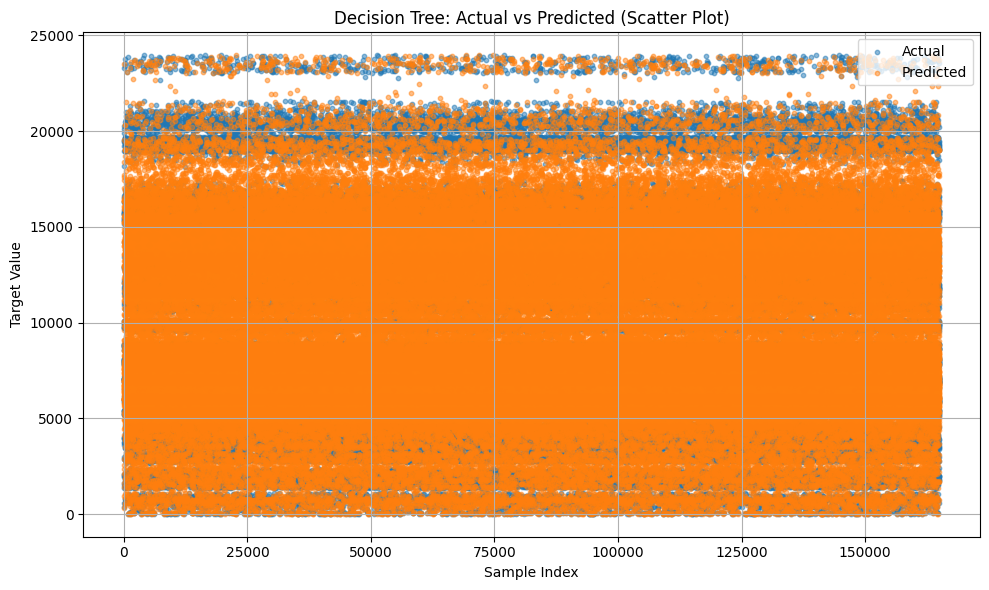

In [98]:
# Huấn luyện và đo thời gian
start_time = time.time()
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
DT_MAE = mean_absolute_error(y_test, y_pred)
end_time = time.time()

print("Mean Absolute Error:", DT_MAE)
print("Execution Time:", end_time - start_time)

# Vẽ biểu đồ scatter 2D
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.5, s=10)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.5, s=10)
plt.title("Decision Tree: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
DT_time = end_time - start_time
DT_r2 = r2_score(y_test, y_pred)
DT_r2

0.6024405348407231

# Random Forest Model

Mean Absolute Error: 2210.4225235871945
Execution Time: 113.40176439285278


<ipython-input-107-a5b97f99e3e1>:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


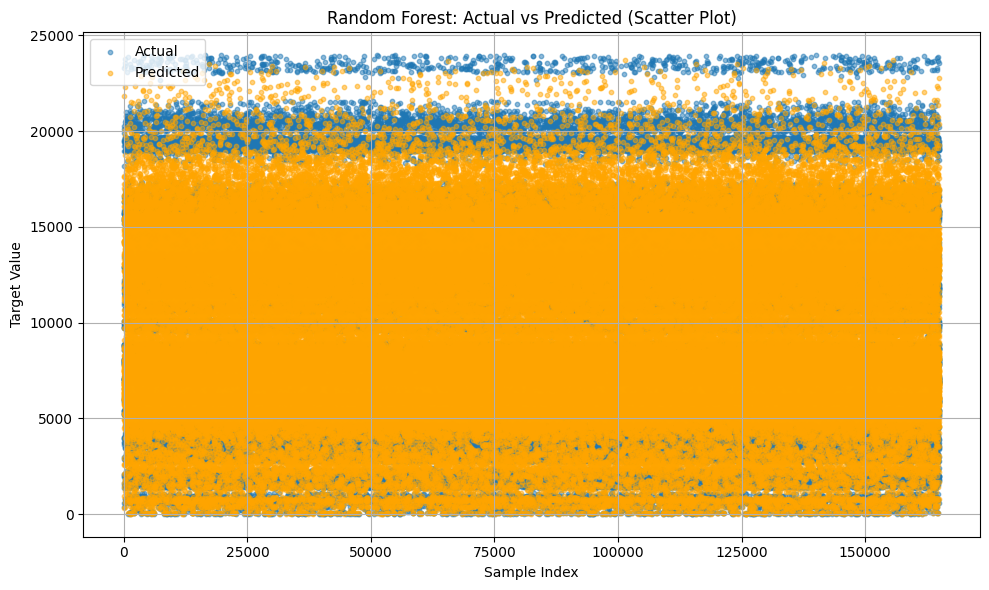

In [107]:
start_time = time.time()

# Huấn luyện mô hình Random Forest
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

# Dự đoán
y_pred = RF.predict(X_test)

# Tính MAE
RF_MAE = mean_absolute_error(y_test, y_pred)
end_time = time.time()

print("Mean Absolute Error:", RF_MAE)
print("Execution Time:", end_time - start_time)

# Vẽ biểu đồ scatter 2D
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.5, s=10)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.5, s=10, color='orange')
plt.title("Random Forest: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
RF_time = end_time - start_time
RF_r2 = r2_score(y_test, y_pred)
RF_r2

0.6024405348407231

# XGB model

Mean Absolute Error: 2212.60791015625
Execution Time: 2.900299549102783


<ipython-input-108-53d6a853a595>:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


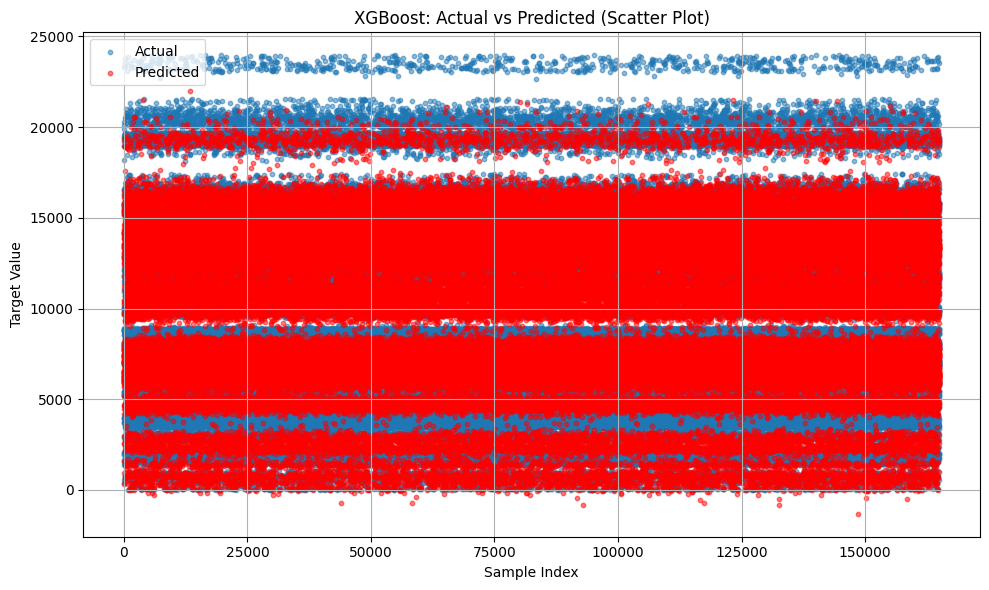

In [108]:

# Huấn luyện và tính thời gian
start_time = time.time()
xgb = XGBRegressor(min_child_weight=7, learning_rate=0.1)  # lưu ý: đúng tham số là min_child_weight
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
XGB_MAE = mean_absolute_error(y_test, xgb_pred)
end_time = time.time()

print("Mean Absolute Error:", XGB_MAE)
print("Execution Time:", end_time - start_time)

# Vẽ biểu đồ scatter 2D
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.5, s=10)
plt.scatter(range(len(xgb_pred)), xgb_pred, label="Predicted", alpha=0.5, s=10, color='red')
plt.title("XGBoost: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
XGB_time = end_time - start_time
XGB_r2 = r2_score(y_test, xgb_pred)
XGB_r2

0.6558319926261902

# Compare Models

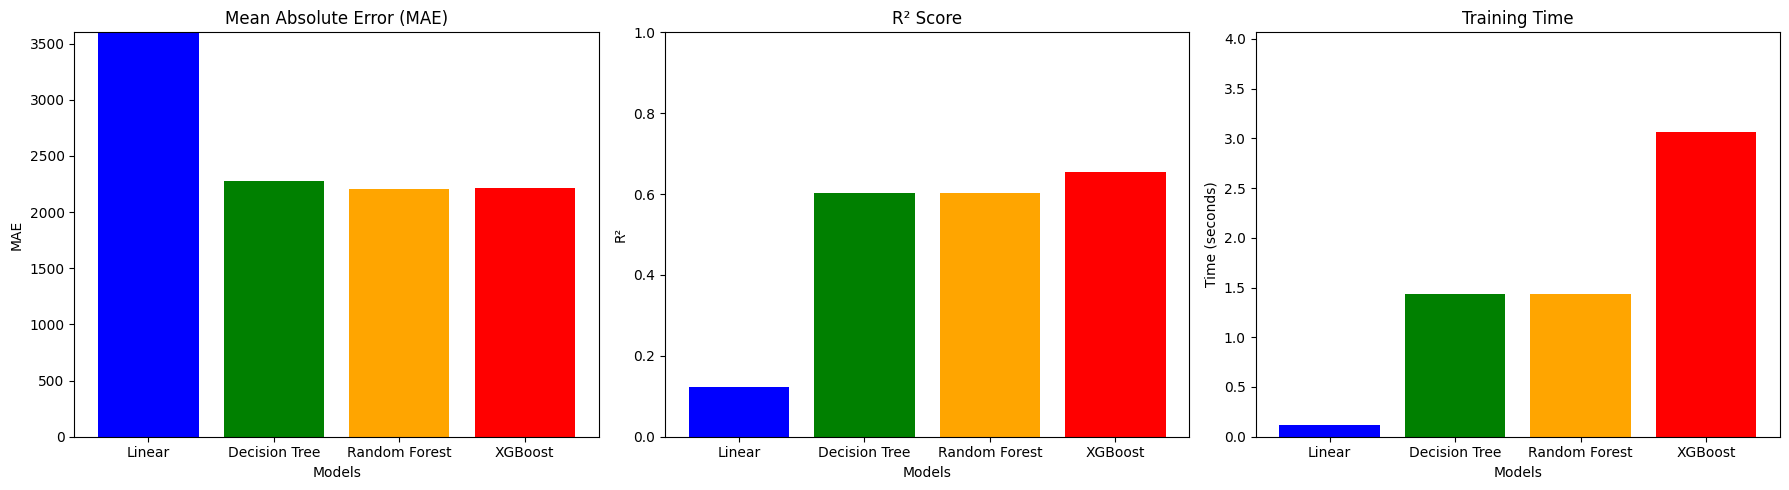

In [103]:
import matplotlib.pyplot as plt

models = ['Linear', 'Decision Tree', 'Random Forest', 'XGBoost']
MAE = [LN_MAE, DT_MAE, RF_MAE, XGB_MAE]
R2 = [LN_r2, DT_r2, RF_r2, XGB_r2]
time = [LN_time, DT_time, RF_time, XGB_time]

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.bar(models, MAE, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Models')
plt.ylim(0, max(MAE) + 1)

plt.subplot(1, 3, 2)
plt.bar(models, R2, color=['blue', 'green', 'orange', 'red'])
plt.title('R² Score')
plt.ylabel('R²')
plt.xlabel('Models')
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.bar(models, time, color=['blue', 'green', 'orange', 'red'])
plt.title('Training Time')
plt.ylabel('Time (seconds)')
plt.xlabel('Models')
plt.ylim(0, max(time) + 1)

plt.tight_layout()
plt.show()